In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("gym_members_exercise_tracking.csv")

In [3]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [4]:
df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [5]:
cat=[df[i].value_counts() for i in df.columns if df[i].dtype=="O"]
cat

[Gender
 Male      511
 Female    462
 Name: count, dtype: int64,
 Workout_Type
 Strength    258
 Cardio      255
 Yoga        239
 HIIT        221
 Name: count, dtype: int64]

In [6]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":2})
df["Workout_Type"]=df["Workout_Type"].map({"Strength":1,"Cardio":2,"Yoga":3,"HIIT":4})

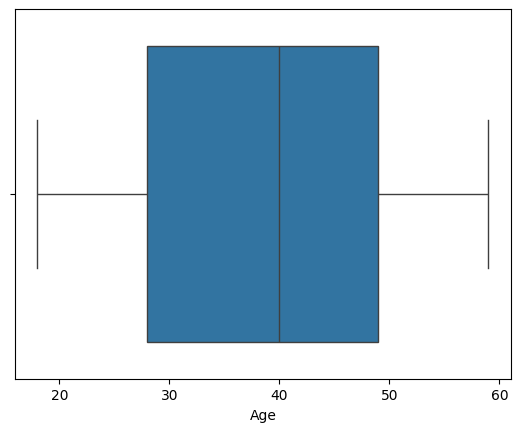

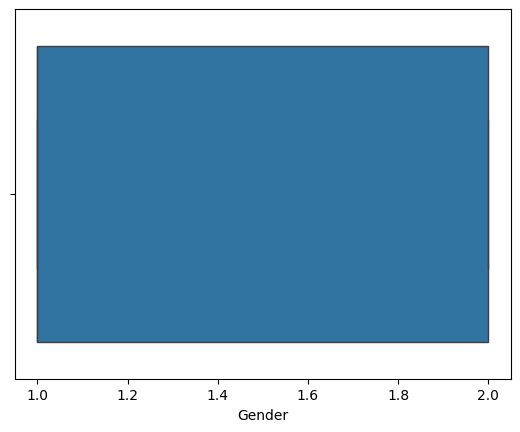

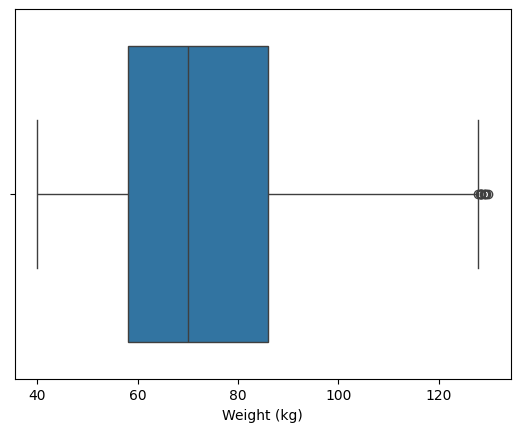

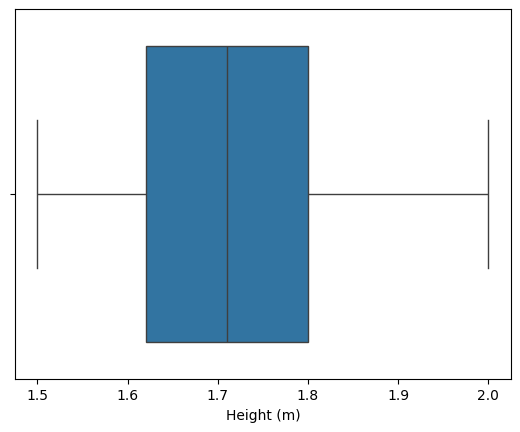

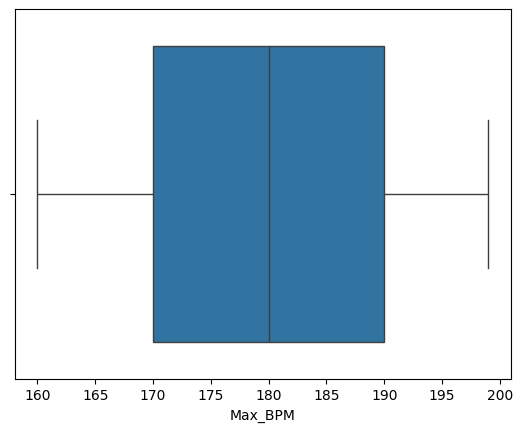

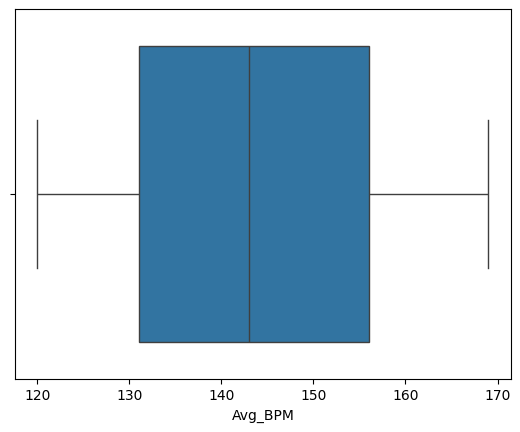

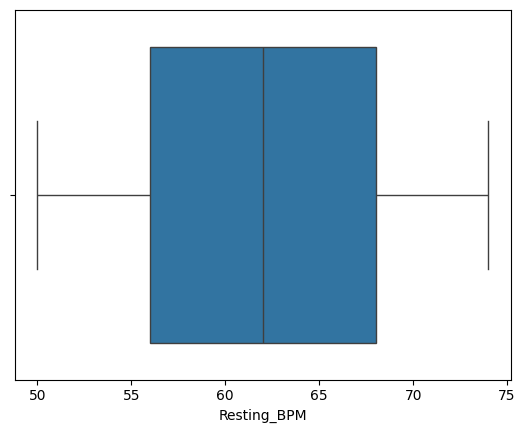

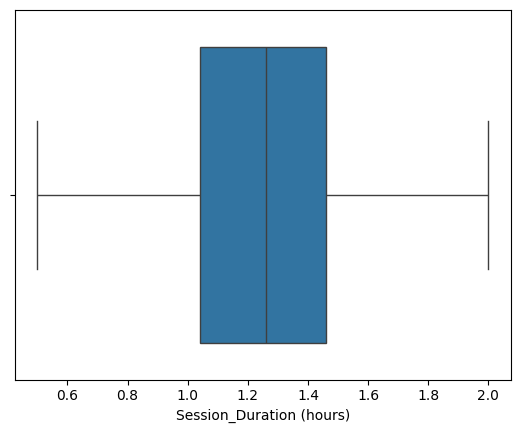

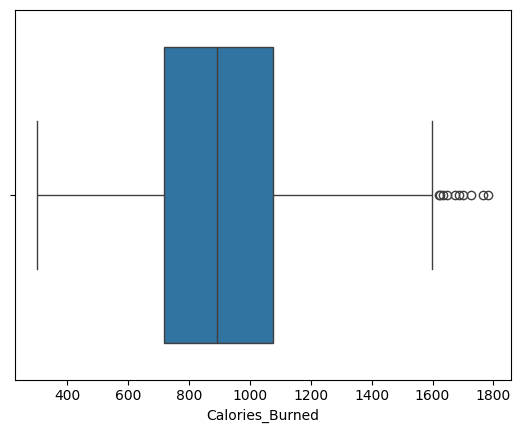

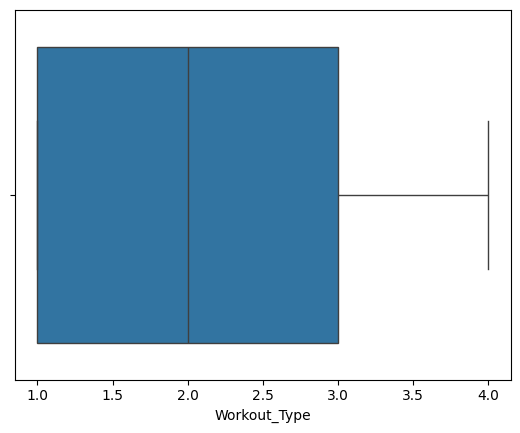

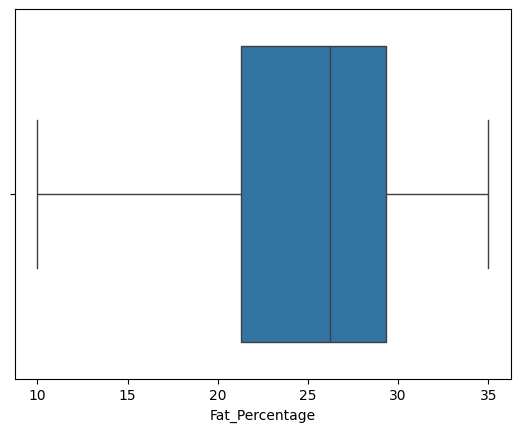

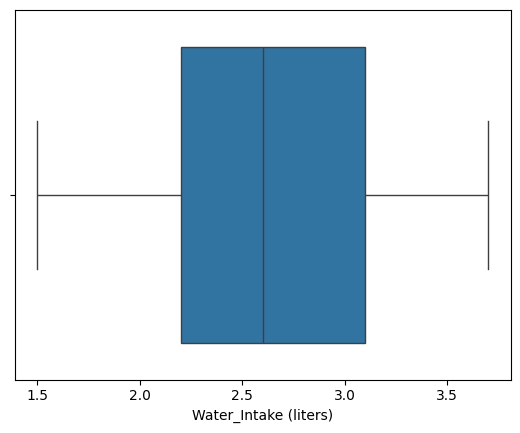

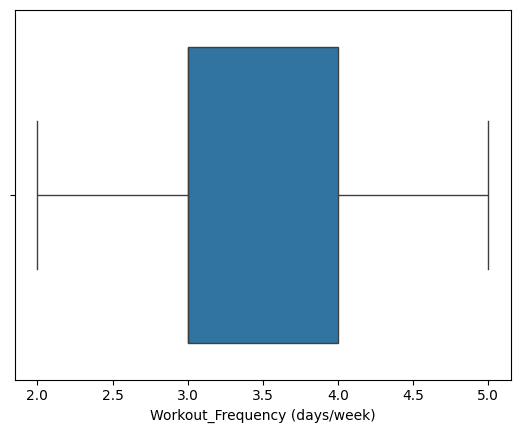

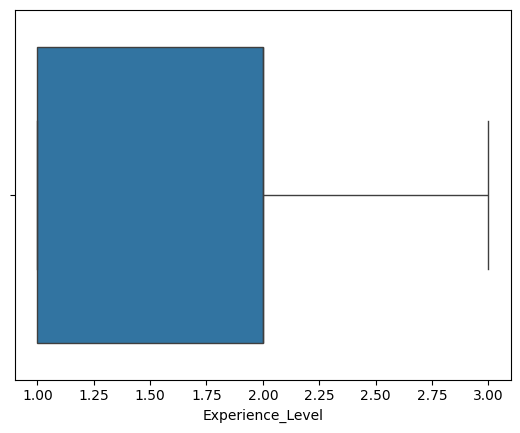

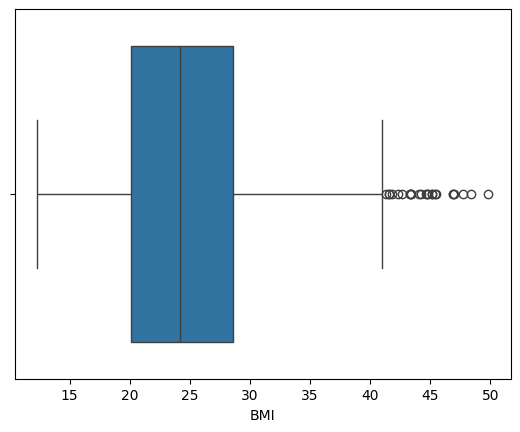

In [7]:
#Checking outliers
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.title="i"
    plt.show()

In [8]:
def outlier(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)

    IQR=Q3-Q1

    df_cleaned=df[(df[column]>Q1-1.5*IQR)&(df[column]<Q3+1.5*IQR)]
    return df_cleaned

In [9]:
df=outlier(df,"Weight (kg)")

In [10]:
df=outlier(df,"Calories_Burned")

In [11]:
df=outlier(df,"BMI")

In [12]:
X=df[['Age', 'Gender', 'Avg_BPM', 'Session_Duration (hours)',
       'Fat_Percentage']]

In [13]:
# X = df.drop(["Calories_Burned"],axis=1)
y=df["Calories_Burned"]

In [14]:
# model=RandomForestRegressor()

In [15]:
# rfe=RFE(model,n_features_to_select=5)
# fit=rfe.fit(X,y)
# selected_features=X.columns[fit.support_]
# selected_features

In [16]:
scaler=StandardScaler()

In [17]:
X_scaler=scaler.fit_transform(X)

In [18]:
y_np=np.array(y).reshape(-1,1)

In [19]:
y_scaler=scaler.fit_transform(y_np)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y_scaler,test_size=0.20,random_state=42)

In [21]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

C:\Rajeev\MachineLearning\Project\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [22]:
y_pred=model.predict(X_test)
y_pred

array([ 1.30489296, -0.33636576, -1.28782617,  0.82038994,  1.24978217,
       -1.83980945,  1.63255097,  1.54832433, -0.97208092,  1.02990991,
       -0.20623883,  0.11479675, -0.72202712, -0.5739359 , -0.23676291,
        0.3535848 , -0.00455922,  0.29561951,  1.01080382,  1.80952968,
        0.3398071 , -1.40683959,  0.92809957,  0.6136103 ,  0.36131097,
        2.09185831, -0.22934122,  0.97251552,  1.5166204 ,  0.27978658,
        1.06793178,  0.17755758,  0.13401701, -0.57325082, -0.73473914,
        0.35449824, -0.47642634, -1.20702492, -0.52826397,  1.6397443 ,
       -0.97131972,  1.06785566, -0.06275287, -0.979122  , -1.66450538,
       -0.67338652, -0.1270361 ,  1.13788595, -0.33408217,  0.76581199,
        0.61848197,  0.60242068,  0.00312889,  0.09751753,  0.75804777,
        0.64950082, -2.02204044,  1.00482841, -0.0286131 ,  0.64344929,
       -0.42066853, -0.09967101,  0.61406702, -1.70568623, -0.18595289,
       -0.48141219,  0.28264107,  0.86933503,  0.01633569, -0.11

In [23]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.02


In [24]:
# Your data and model prediction
data = [56, 1, 157, 1.69, 12.6]
data_np = np.array(data).reshape(1, -1)



In [25]:
data_np.shape

(1, 5)

In [26]:
data_np

array([[ 56.  ,   1.  , 157.  ,   1.69,  12.6 ]])

In [27]:
data_scaled=scaler.fit_transform(data_np)

In [28]:
data_scaled.shape

(1, 5)

In [29]:
data_predict=model.predict(data_scaled)

In [30]:
data_predict

array([0.30730391])

In [31]:
data_predict.shape

(1,)

In [32]:
y_train.shape

(744, 1)